In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from geopy.geocoders import Nominatim
from geopy.point import Point
import seaborn as sns
import folium
from folium.plugins import HeatMap
import plotly.express as px
import geopandas as gpd
from shapely import wkt
from sklearn.preprocessing import MinMaxScaler
from shapely.geometry import Point, LineString, Polygon, MultiPoint
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.figsize"] = (8, 8)


warnings.simplefilter("ignore")

In [2]:
mdata_02 = pd.read_csv('C:/Users/pranj/Downloads/DCU/DCU_mobiles_01-04-2022_31-07-2022.csv', sep=';')

In [3]:
mdata_01 = pd.read_csv('C:/Users/pranj/Downloads/DCU/DCU_mobiles_01-10-2021_30-01-2022.csv', sep=';')

In [4]:
fdata_01 = pd.read_csv("C:/Users/pranj/Downloads/DCU/DCU_fixed_01-04-2022_31-07-2022.csv", sep=';')

In [5]:
fdata_02 = pd.read_csv("C:/Users/pranj/Downloads/DCU/DCU_fixed_01-10-2021_31-01-2022.csv", sep=';')

In [6]:
fdata_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2929865 entries, 0 to 2929864
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
dtypes: float64(2), int64(2)
memory usage: 89.4 MB


In [7]:
fdata_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3493181 entries, 0 to 3493180
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
dtypes: float64(2), int64(2)
memory usage: 106.6 MB


In [8]:
mdata_02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2790611 entries, 0 to 2790610
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
 4   latitude      float64
 5   longitude     float64
dtypes: float64(4), int64(2)
memory usage: 127.7 MB


In [9]:
mdata_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5239198 entries, 0 to 5239197
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
 4   latitude      float64
 5   longitude     float64
dtypes: float64(4), int64(2)
memory usage: 239.8 MB


In [10]:
mdata_df = pd.concat([mdata_01, mdata_02])

In [11]:
fdata_df = pd.concat([fdata_01, fdata_02])

In [12]:
fdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6423046 entries, 0 to 3493180
Data columns (total 4 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
dtypes: float64(2), int64(2)
memory usage: 245.0 MB


In [13]:
mdata_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8029809 entries, 0 to 2790610
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   timestamp     int64  
 1   sensor ID     int64  
 2   pm2.5(ug/m3)  float64
 3   pm10(ug/m3)   float64
 4   latitude      float64
 5   longitude     float64
dtypes: float64(4), int64(2)
memory usage: 428.8 MB


In [13]:
mdata_df['date_time'] = pd.to_datetime(mdata_df['timestamp'], unit='s')

In [28]:
fdata_df['date_time'] = pd.to_datetime(fdata_df['timestamp'], unit='s')

In [15]:
fdata_df.head()

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),date_time
0,1648771251,869170034045121,5.40,7.18,2022-04-01 00:00:51
1,1648771253,869170033931073,4.50,6.57,2022-04-01 00:00:53
2,1648771256,869170034081928,7.05,9.35,2022-04-01 00:00:56
3,1648771261,869170033930547,4.95,5.40,2022-04-01 00:01:01
4,1648771271,869170034081928,6.90,8.09,2022-04-01 00:01:11


In [36]:
mdata_df.head()

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),latitude,longitude,date_time
0,1633046403,869170034050501,1.33,1.33,53.320283,-6.363592,2021-10-01 00:00:03
1,1633046405,869170034040783,2.46,3.69,53.388120,-6.171005,2021-10-01 00:00:05
2,1633046407,869170034084252,1.42,1.42,53.320965,-6.361845,2021-10-01 00:00:07
3,1633046417,869170034040783,2.69,6.15,53.388120,-6.171005,2021-10-01 00:00:17
4,1633046418,869170034084252,1.75,1.75,53.320965,-6.361845,2021-10-01 00:00:18


In [16]:
mdata_df = mdata_df.sort_values(by=['date_time'])

In [29]:
fdata_df = fdata_df.sort_values(by=['date_time'])

In [18]:
fdata_df.tail()

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),date_time
2929861,1659311982,869170034063280,4.13,5.03,2022-07-31 23:59:42
2929860,1659311982,869170033930620,3.50,3.83,2022-07-31 23:59:42
2929862,1659311984,869170034081928,5.44,5.95,2022-07-31 23:59:44
2929863,1659311986,869170033930471,2.28,2.58,2022-07-31 23:59:46
2929864,1659311988,869170033931073,3.70,4.57,2022-07-31 23:59:48


In [24]:
mdata_df.tail()

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),latitude,longitude,date_time
2790606,1659311934,869170034050501,0.58,0.58,53.338073,-6.377980,2022-07-31 23:58:54
2790607,1659311946,869170034050501,0.58,0.58,53.338073,-6.377980,2022-07-31 23:59:06
2790608,1659311957,869170034050501,0.50,0.75,53.338073,-6.377980,2022-07-31 23:59:17
2790609,1659311987,869170034050501,2.33,2.33,53.338073,-6.377978,2022-07-31 23:59:47
2790610,1659311999,869170034050501,1.50,1.50,53.338073,-6.377978,2022-07-31 23:59:59


In [22]:
max_date_time = mdata_df['date_time'].max()

In [23]:
max_date_time

Timestamp('2022-07-31 23:59:59')

In [24]:
min_date_time = mdata_df['date_time'].min()

In [25]:
min_date_time

Timestamp('2021-10-01 00:00:03')

In [30]:
max_date_time = fdata_df['date_time'].max()

In [31]:
max_date_time

Timestamp('2022-07-31 23:59:48')

In [32]:
min_date_time = fdata_df['date_time'].min()

In [33]:
min_date_time

Timestamp('2021-10-01 00:00:41')

In [14]:
count_mdata_df=mdata_df.count()

In [16]:
count_mdata_df

timestamp       8029809
sensor ID       8029809
pm2.5(ug/m3)    8029809
pm10(ug/m3)     8029809
latitude        8029809
longitude       8029809
dtype: int64

In [37]:
mdata_df['day_name'] = mdata_df['date_time'].dt.day_name()
mdata_df['year'] = mdata_df['date_time'].dt.year
mdata_df['month'] = mdata_df['date_time'].dt.month
mdata_df['hour'] = mdata_df['date_time'].dt.hour
mdata_df['day'] = mdata_df['date_time'].dt.day

In [38]:
mdata_df[mdata_df['hour'] == 00].max()

timestamp                1659229198
sensor ID           869170034090531
pm2.5(ug/m3)                  99.75
pm10(ug/m3)                  160.09
latitude                  54.222328
longitude                       0.0
date_time       2022-07-31 00:59:58
day_name                  Wednesday
year                           2022
month                            12
hour                              0
day                              31
dtype: object

In [27]:
mdata_df.head()

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),latitude,longitude,date_time,day_name,year,month,hour,day
0,1633046403,869170034050501,1.33,1.33,53.320283,-6.363592,2021-10-01 00:00:03,Friday,2021,10,0,1
1,1633046405,869170034040783,2.46,3.69,53.388120,-6.171005,2021-10-01 00:00:05,Friday,2021,10,0,1
2,1633046407,869170034084252,1.42,1.42,53.320965,-6.361845,2021-10-01 00:00:07,Friday,2021,10,0,1
3,1633046417,869170034040783,2.69,6.15,53.388120,-6.171005,2021-10-01 00:00:17,Friday,2021,10,0,1
4,1633046418,869170034084252,1.75,1.75,53.320965,-6.361845,2021-10-01 00:00:18,Friday,2021,10,0,1


In [19]:
fdata_df['day_name'] = fdata_df['date_time'].dt.day_name()
fdata_df['year'] = fdata_df['date_time'].dt.year
fdata_df['month'] = fdata_df['date_time'].dt.month
fdata_df['hour'] = fdata_df['date_time'].dt.hour
fdata_df['day'] = fdata_df['date_time'].dt.day

In [20]:
fdata_df[fdata_df['hour'] == 00].max()

timestamp                1659229185
sensor ID           869170034086034
pm2.5(ug/m3)                 149.15
pm10(ug/m3)                  170.24
date_time       2022-07-31 00:59:45
day_name                  Wednesday
year                           2022
month                            12
hour                              0
day                              31
dtype: object

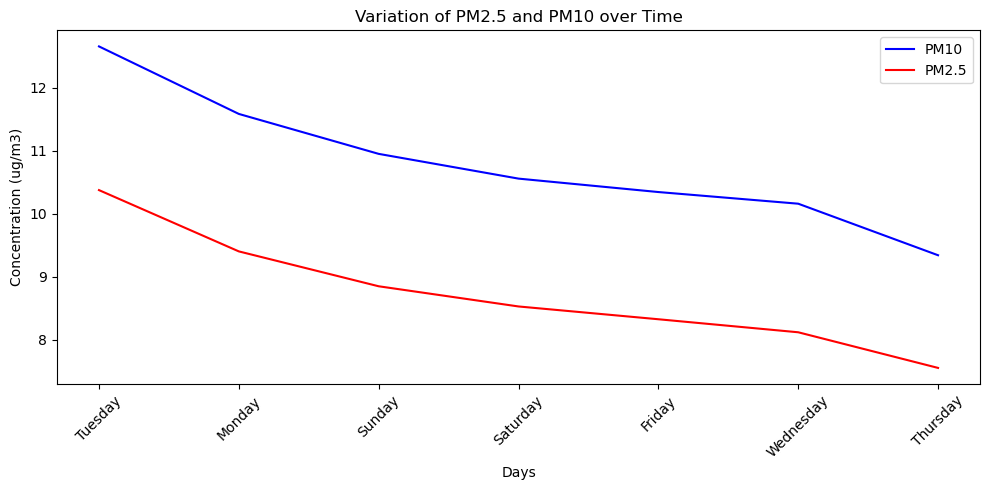

In [15]:
# Plotting PM10 over time
plt.figure(figsize=(10, 5))
plt.plot(mdata_df[['day_name','pm10(ug/m3)']].groupby(["day_name"]).mean().sort_values(by='pm10(ug/m3)', ascending = False) ,label='PM10', color='blue')

# Plotting PM2.5 over time
plt.plot(mdata_df[['day_name','pm2.5(ug/m3)']].groupby(["day_name"]).mean().sort_values(by='pm2.5(ug/m3)', ascending = False), label='PM2.5', color='red')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Concentration (ug/m3)')
plt.title('Variation of PM2.5 and PM10 over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

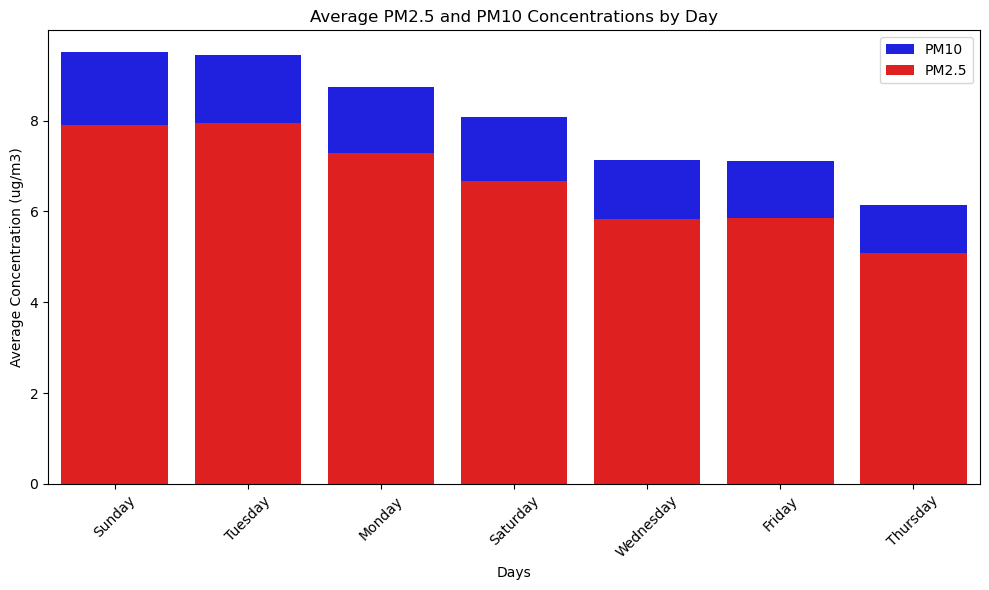

In [24]:
average_concentrations = fdata_df.groupby('day_name')[['pm10(ug/m3)', 'pm2.5(ug/m3)']].mean().sort_values(by='pm10(ug/m3)', ascending=False)

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=average_concentrations.index, y='pm10(ug/m3)', data=average_concentrations, color='blue', label='PM10')
sns.barplot(x=average_concentrations.index, y='pm2.5(ug/m3)', data=average_concentrations, color='red', label='PM2.5')

# Adding labels and title
plt.xlabel('Days')
plt.ylabel('Average Concentration (ug/m3)')
plt.title('Average PM2.5 and PM10 Concentrations by Day')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


In [30]:
mdata_df.groupby(['day_name'])['pm2.5(ug/m3)'].mean().sort_values(ascending=False)

day_name
Tuesday      10.376079
Monday        9.403769
Sunday        8.850475
Saturday      8.530203
Friday        8.327358
Wednesday     8.120755
Thursday      7.555344
Name: pm2.5(ug/m3), dtype: float64

In [31]:
mdata_df.groupby(['day_name'])['pm10(ug/m3)'].mean().sort_values(ascending=False)

day_name
Tuesday      12.655606
Monday       11.584527
Sunday       10.950931
Saturday     10.558320
Friday       10.345326
Wednesday    10.160416
Thursday      9.342739
Name: pm10(ug/m3), dtype: float64